# Liverpool Assignment
- Installing Packages
- Preparing and Exploring the Dataset
- Unsupervised Learning
- Supervised Learning

## Installing packages

In [4]:
#tells matplotlib to use the inline backend which renders the graphs in the notebook

%matplotlib inline 

#imports the packages needed and renames some for convenience 

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed

import prince
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler


## Importing and exploring the dataset

For this assignment I used the "Student Performance Data Set" from the UCI Machine Learning archive (https://archive.ics.uci.edu/ml/datasets/student+performance#).

This is two datasets on educational performance at two schools in Portugal.

The first dataset is on performance in maths (n = 395), the second is on performance in Portugese (n = 649). 

Whilst students in the first dataset *seem* to be present in the second dataset, the data appears to be have been gathered at different times in the year and for a small number of students certain attributes have changed which makes a join of the datasets of questionable validity.

I will therefore focus on the larger portugese acheivement dataset, I will however investigate whether the predictors of sucess are similar for maths and portugese. In particular I will look at whether being sucessful maths predicts sucess in portugese. 


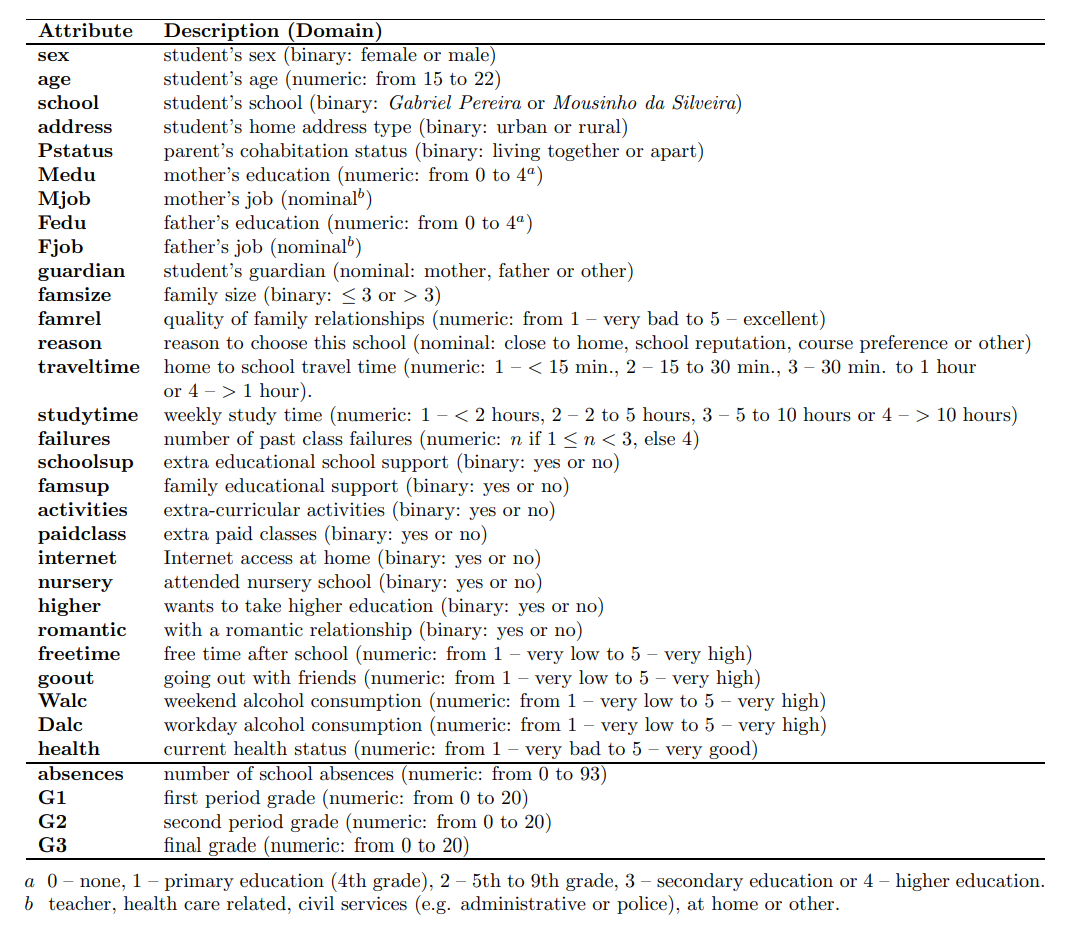

In [5]:
Image("../Liverpool Assignment/Attribute_table.png") #displays a png explaining the variables in the dataset

In [6]:
#uses read_csv from pandas to import read in the csv file
db_port = pd.read_csv("../Liverpool Assignment/Data/student-por.csv", sep = ";", header = 0)

#uses pandas' describe function to provide descriptive statistics on our variables, categorical variables are included by setting the 'include' to 'all'. 
db_port.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649,NaN,NaN,NaN,16.7442,1.21814,15,16,17,18,22
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649,NaN,NaN,NaN,2.51464,1.13455,0,2,2,4,4
Fedu,649,NaN,NaN,NaN,2.30663,1.09993,0,1,2,3,4
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Exploring the dataset

Visually inspecting the table above, some outliers stand out. 
For example whilst the average age is ~16.7, however the maximum age is 22

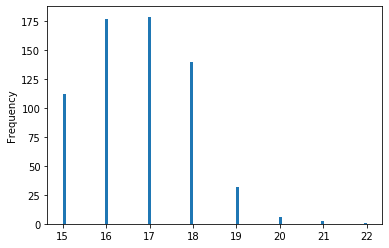

In [7]:
db_port["age"].plot.hist(bins=100) #plots a histogram with 100 bins of the frequncency of the values of the variable age from the data frame db_port

We can see that most students are between 15 and 19, however the number of students who are 20 and older in unclear from this plot, so we can instead use value_counts from pandas to return a table  

In [8]:
db_port["age"].value_counts(ascending = True) #provides a table of the values for age from the db_port data frame, in ascending order

22      1
21      2
20      6
19     32
15    112
18    140
16    177
17    179
Name: age, dtype: int64

It appears that there are very few students in these older age groups. There could be a number of reasons we could speculate about why these outliers are in the dataset. We can use queries to see if variables in the dataset can explain 

In [56]:
db_port.query("age > 19")[["age", "G3", "failures", "absences", "health"]] #queries the db_port dataframe for information on five specific variables for students aged 20 and older

,age,G3,failures,absences,health
279,22,5,3,12,1
299,20,12,0,8,2
351,20,15,2,0,5
407,21,12,2,0,5
413,21,10,2,21,4
414,20,15,0,8,3
421,20,10,1,5,5
506,20,10,1,8,3
574,20,10,1,12,4


In [59]:
#queries the dataframe for individuals of age 20 and 21
#specifies that it is the G3 and absences variables that should be extracted
#calculates the mean
db_port.query("22 > age > 19")\
        [["G3", "absences"]]\
        .mean() 

G3          11.75
absences     7.75
dtype: float64

We can see from the results of these queries that the only 22 year old has very bad health, a high number of absences, and poor grades.
The other older students have grades (mean = 11.75) within a stadard deviation of the dataset average of 11.9 .
However the mean number of absences (7.75) is more than twice the dataset average of 3.6 .

We can also explore other relationships within the data by creating new variables, for example G3 is the students final grades and G1 is the students first period grade, a new variable calculated as G1 - G3 could provide insight into how much a student has improved over the year, which we can then compare to variables such as whether the student had received extra paid classes.

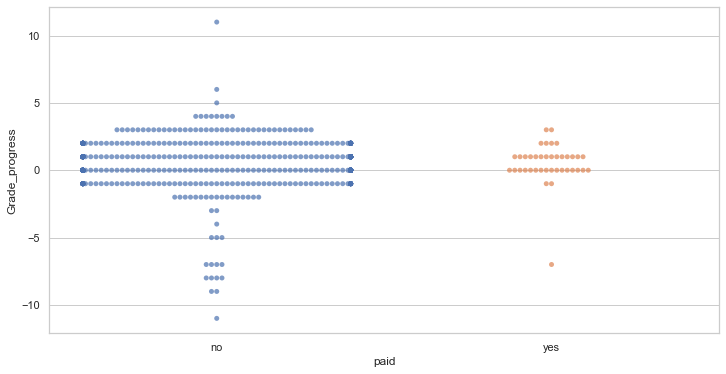

In [62]:
db_port2 = db_port.assign(Grade_progress = lambda x: db_port['G3']
                                                -db_port['G1'])
sns.set(rc={'figure.figsize':(12,6)}) #sets the size of figures created using seaborn

sns.set_style("whitegrid")           #this sets the aesthetic of seaborne plots to whitegrid, which provides a handy line for y = 0
sns.swarmplot(x = "paid",            #calls the swarmplot function from the seaborne package, defines the x axis as the paid variable
              y = "Grade_progress",  #defines the y axis as grade progress
               data = db_port2,      #tells the package what data to use
              alpha=0.7              #sets the transparency of the points plotted
             );

We can see from this plot that most students improve their scores over the year, and that students who received extra paid classes are less likely to see their grades drop throughout the year.

- Conclusion

In this section I have installed the required packages, read in our dataset and performed some initial exploration of the data.
In the next section I will look at how clustering algorythms can help us further out understanding of the dataset.

## Unsupervised learning

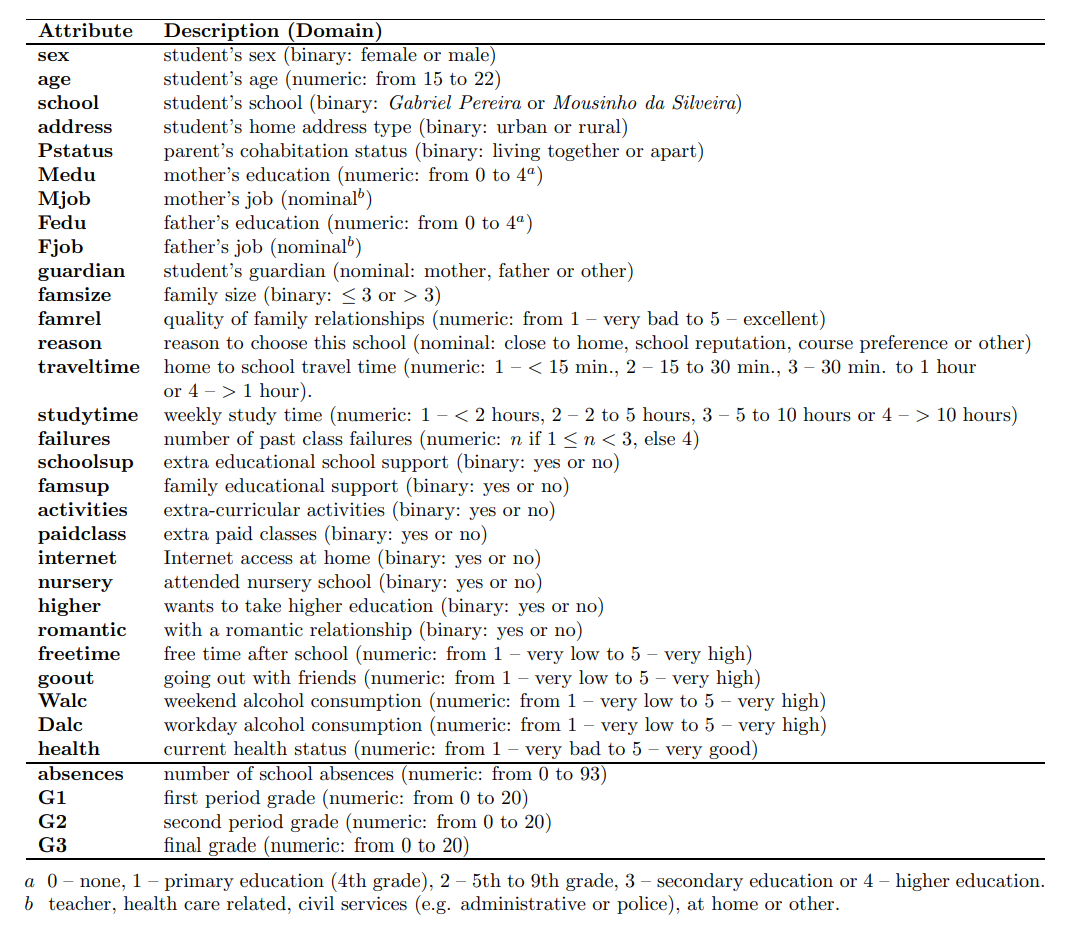

In [12]:
Image("../Liverpool Assignment/Attribute_table.png")

We can see from looking at the above that many of the variables could potentially outline groupings. 

For example some variables seem to relate directly to the students home and family situation ('address','famsize','Pstatus', 'famrel', 'Medu', 'Fedu','Mjob', 'Fjob', 'guardian', 'famsup', 'internet', 'traveltime'). It could be fruitfull to apply a clustering algorythm to these variables to test if there are meaningfull groupings of home situations and explore whether these impact outcomes such as grades and absesnces. However of these variables only 4 are numeric ('Medu', 'Fedu' 'famrel','traveltime').

Given that most of our data is not numeric, we can take two approaches here:
 - Fitting k-means models on all the numerical variables.
 - Using Factor Analysis with Mixed Data (Pagès, 2002) to include all these variables in our dataset.
 

In [63]:
#Creating scaled arrays for all the numerical variables
Num_variables = ['Medu', 'Fedu', 'famrel','traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

db_portnum = scale(db_port.filter(Num_variables))

db_portstd = pd.DataFrame(db_portnum, 
                 index = db_port.index,
                 columns = Num_variables
                )


- Fitting a KMeans clustering with 5 clusters on our *unscaled* data.

In [68]:
seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

estimator = KMeans(n_clusters = 5) #creating an KMeans estimator with 5 clusters

estimator.fit(db_port.filter(Num_variables)) #computes kmean clustering for the numerical variables

k5_raw = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above


- Fitting a KMeans clustering with 5 clusters on our *scaled* data.

In [15]:

estimator.fit(db_portstd) #computes kmean clustering for the scales values of the numerical variables

k5_std = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above

- We can also fit a principle componant analysis model, this allows us to project our data into 2 dimensions allowing us new ways of fitting our kmeans clustering algorythm and giving us the ability to visualise our other clusterings.

In [17]:
pca_estimator = PCA(n_components=2)

components = pca_estimator.fit_transform(db_port.filter(Num_variables))

components = pd.DataFrame(components,
                              index = db_port.index,
                              columns = ["C-1", "C-2"]
                             )

estimator.fit(components)

k5_pca = pd.Series(estimator.labels_,
                       index=components.index
                      )

- We can compare these models visually to see if they are similar.

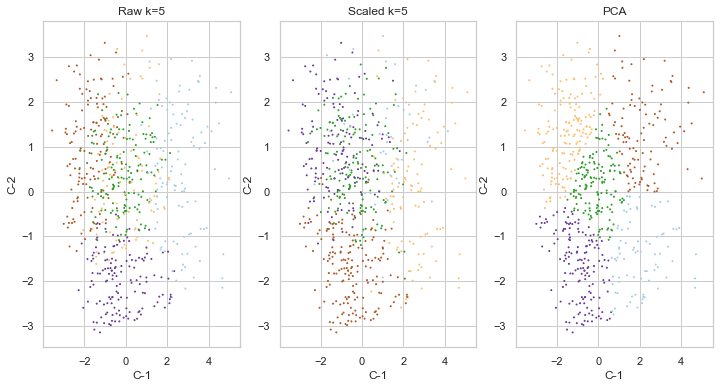

In [69]:
f, axs = plt.subplots(1, 3, figsize=(12, 6))

ax = axs[0]

components.assign(labels=k5_raw)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Raw k=5")         

ax = axs[1]

components.assign(labels=k5_std)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Scaled k=5")    
             
ax = axs[2]

components.assign(labels=k5_pca)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("PCA")   
             
plt.show()

Worrying, these aren't very similar. The Pca seems to have the more distinct groups, and the scaled data seems to fare better than the raw data.

We can instead try to use to factor analysis using mixed data model to include **all** our variables. This method applies a multiple corespondence analysis style approach to cathegorical variables, and 

- Fitting a Fator Analysis with Mixed Data using Max Halford's "Prince" package (https://github.com/MaxHalford/prince)

In [88]:
db_port_pred = db_port.filter(['address','famsize','Pstatus', 'famrel', 'Medu', 'Fedu','Mjob', 'Fjob', 'guardian', 'famsup', 'internet', 'traveltime']) #first we create a new dataframe without the dependant variables (grades and absenses)

seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

famd_estimator = prince.FAMD(    
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=None,
    engine='auto',
)

famd_estimator = famd_estimator.fit(db_port_pred) 

componentsmfa = pd.DataFrame(famd_estimator.transform(db_port_pred), index = db_port_pred.index)

componentsmfa.columns = ["C-1", "C-2"] #this renames the columns, when I try to do this as part of the previous line my computer crashes, I do not understand this.

estimator.fit(componentsmfa)

k5_famd = pd.Series(estimator.labels_,
                       index=components.index
                      )


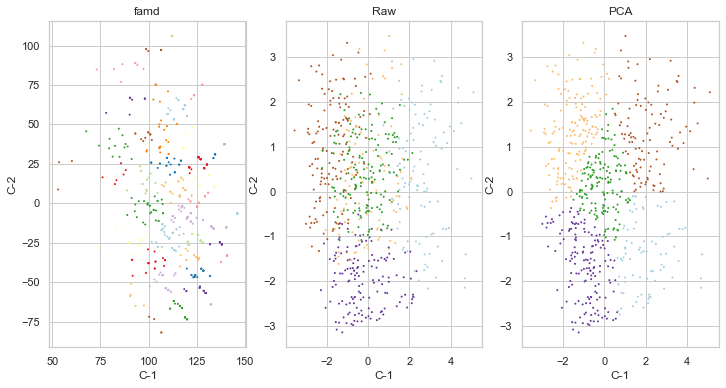

In [89]:
f, axs = plt.subplots(1, 3, figsize=(12, 6))

ax = axs[0]
componentsmfa.assign(labels=k5_famd)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("famd")

ax = axs[1]
components.assign(labels=k5_raw)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Raw")

ax = axs[2]
components.assign(labels=k5_pca)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("PCA")

plt.show()

- Evaluating our clustering models using the Calinski and Harabasz score

The first non-visual way in which we can evaluate our models is using the Calinski and Harabasz score or Variance Ratio Criterion. This metric calculates the ratio of dispersion within clusters and between clusters. Unfortunately we cannot use Calinski and Harabasz for the FAMD results as this metric relies on caluclating geometric distances between points which is not meaningfull for a mix of categorical and numerical data. 

In [70]:
chs_raw = calinski_harabasz_score(db_port.filter(Num_variables), k5_raw)

chs_std = calinski_harabasz_score(db_port.filter(Num_variables), k5_std)

chs_pca = calinski_harabasz_score(db_port.filter(Num_variables), k5_pca)


In [71]:
pd.Series({"Raw": chs_raw,
               "Standardised": chs_std,
               "PCA": chs_pca,
              })

Raw             91.843574
Standardised    68.602010
PCA             71.166678
dtype: float64

The KMeans clustering on the unscaled variables is the best score according to this metric.

We can try to optimise the number of clusters in this fit by calculating the Calinski and Harabasz score for a number of values of k. We then plot the reulsts against the number of clusters in what is known as an elbow plot.

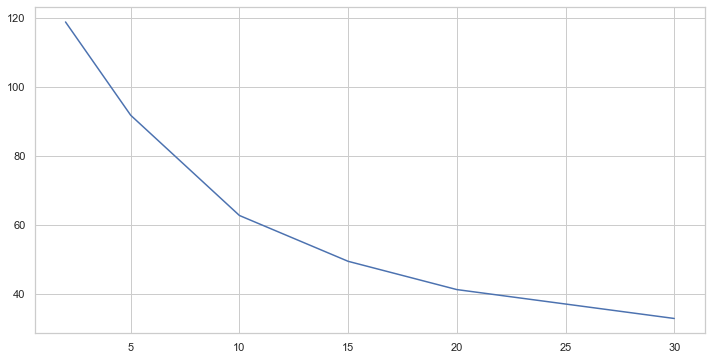

In [73]:
seed(12345)

chss = {}    #create an empty dict
for i in [2, 5, 10, 15, 20, 30]:
    estimator = KMeans(n_clusters=i)
    estimator.fit(db_port.filter(Num_variables))
    chs = calinski_harabasz_score(db_port.filter(Num_variables),
                                  estimator.labels_
                                 )
    chss[i] = chs
chss = pd.Series(chss)

chss.plot.line()

It appears that running out model with k = 10 will provide us with the best clustering.

In [74]:
seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

estimator10 = KMeans(n_clusters = 10) #creating an KMeans estimator with 10 clusters

estimator10.fit(db_port.filter(Num_variables)) #computes kmean clustering for the numerical variables

k10_raw = pd.Series(estimator10.labels_, index=db_port.index)

Another way we can asses the quality of our clustering is using silhouette scores.

- Evaluating our clustering models using Silhouette Scores

In [75]:
sil_raw10 = silhouette_score(db_port.filter(Num_variables), k10_raw,
                           metric="euclidean"
                          )
sil_raw5 = silhouette_score(db_port.filter(Num_variables), k5_raw,
                           metric="euclidean"
                          )
sil_std = silhouette_score(db_port.filter(Num_variables), k5_std,
                           metric="euclidean"
                          )
sil_pca = silhouette_score(db_port.filter(Num_variables), k5_pca,
                           metric="euclidean"
                          )

pd.Series({"Raw k=5": sil_raw5,
           "Raw k=10": sil_raw10,
               "Standardised": sil_std,
               "PCA": sil_pca,
              })

Raw k=5         0.126987
Raw k=10        0.111336
Standardised    0.104192
PCA             0.092366
dtype: float64

Silhouette scores are bound between 1 and -1 with scores close to zero indicating that there is a high level of overlap between our clusters. 
We can see that of the 5 cluster models the k means on the raw data fares the best (though not by much). Interestingly the ten-cluster k means on the raw data is slightly worse than the five-cluster k means, contrary to what our elbow plot would have suggested.

As with above, we can run our model with a number of clusters and see which has the best silhouette score.


In [76]:
seed(12345)

sils = {}    #create an empty dict
for i in [2, 5, 10, 15, 20, 30, 40]:
    estimator = KMeans(n_clusters=i)
    estimator.fit(db_port.filter(Num_variables))
    sil = silhouette_score(db_port.filter(Num_variables),
                                  estimator.labels_,
                           metric="euclidean"
                                 )
    sils[i] = sil
sils = pd.Series(sils)

sils

2     0.161916
5     0.125977
10    0.110136
15    0.101352
20    0.088309
30    0.098553
40    0.102087
dtype: float64

Here the highest score is for k=2, k=5 does however have the second highest score.

- Exploring our clusterings internally.

In [84]:
g = db_port.filter(Num_variables).groupby(k5_std) #creates an object g with the values of the variables in our clustering grouped according to the results of the clustering

g.mean() #creates a table with the mean value of each variable for each cluster

,Medu,Fedu,famrel,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health
0,1.673913,1.565217,3.978261,1.934783,1.478261,1.934783,3.782609,3.652174,1.760870,2.717391,3.847826
1,2.143713,1.856287,4.359281,1.377246,2.071856,0.053892,3.658683,3.616766,1.137725,1.832335,3.107784
2,2.622642,2.462264,3.773585,1.716981,1.660377,0.141509,3.613208,4.113208,2.933962,4.179245,3.952830
3,1.711409,1.557047,3.442953,1.865772,1.885906,0.174497,2.369128,2.275168,1.221477,1.818792,3.322148
4,3.668508,3.436464,4.016575,1.320442,2.110497,0.027624,3.000000,2.872928,1.165746,1.850829,3.784530


In [81]:
g.size() #outouts the number of students in each cluster

0     46
1    167
2    106
3    149
4    181
dtype: int64

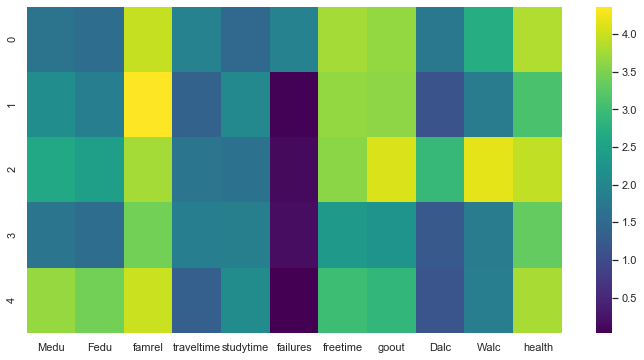

In [78]:
sns.heatmap(g.mean(), cmap='viridis') #creates a heatmap using seaborn with the average values for each variable in each of our clusters

As expected from the results of the silhouette scores there is much overlap between our clusters. 

Cluster 0 is notable for having particularily high average amounts of past failures as well as the lowest levels of average parental education, and studytime. Students from this cluster go out with friends more and have the most freetime on average,and have the second higest level of both weekend and weektime alcohol comsumption.

Cluster 2 have massively higher levels of alcohol consumption compared to other groups, interestingly they also have the highest average health.

In contrast cluster 4 have the highest levels of parental education and studytime and low levels of alcohol consumption.

It is a shame there is not a geographical measurment that could help explain some of these clusterings. Travel time could be somewhat related to rurality, but could be confounded by issues such as teh availability of public transport or of a parent to drive the child to school.

- Characterising our clusterings externally.

In [79]:
db_port.groupby(k5_std)["absences", "G3"].mean() #outputs a table with the mean values of absences and final grades for students in each cluster

<ipython-input-79-a77408d6ca26>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  db_port.groupby(k5_std)["absences", "G3"].mean()


,absences,G3
0,4.826087,8.586957
1,3.269461,12.287425
2,5.094340,10.726415
3,3.536913,11.362416
4,2.983425,13.535912


As expected from looking at our clustering internally, group 0 has the worst outcome in terms of average final grade, and group 4 has the highest.

Group 2 had the highest levels of alcohol consumption and went out with friends more often. Unsurprisingly, they had the higest average level of absences. The cluster with the second higest level of weekday alcohol consumption (cluster 0) also had the second highest average level of absences.

Cluster 3 seems the hardest to interpret, it also has low average parental education but has comparatively good grades compared to group one, however cluster 3 students don#t go out with friends as much on average and have lower average freetime. However this does not translate into more studytime.

- Exploring the famd clustering

In [80]:
h = db_port_pred.groupby(k5_famd)
h.mean()

,famrel,Medu,Fedu,traveltime
0,4.041667,2.583333,2.083333,1.291667
1,4.041667,1.791667,1.875000,2.250000
2,3.909091,2.727273,2.515152,1.545455
3,3.714286,3.000000,3.000000,1.214286
4,4.000000,2.500000,1.857143,1.857143
5,3.956522,2.260870,1.869565,1.521739
6,4.000000,3.185185,3.111111,1.222222
7,4.333333,2.166667,1.666667,1.833333
8,3.571429,2.214286,2.357143,1.571429
9,4.300000,2.550000,2.300000,1.550000


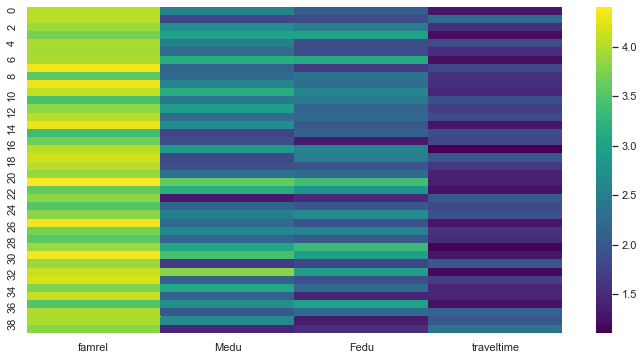

In [85]:
sns.heatmap(h.mean(), cmap='viridis')

- Conclusion

In this section I have have tried a number of unsupervised approaches to some education data. My intial concern was that the mainly categorical nature of the data would impede meaningull clusterings, I therefore searched the litterature for methods of meaningfully clusting using mixed data.

However this inital concern was misguided as the clusters provided by the few numerical variables were both interpretable and appeared to predict key outcomes in logical ways. Conversly the approach which included cagorical variables was uninterpretable and did not make logical predictions.

## Supervised Learning

In this section I will try to make predictions about end of year grades.

The first consideration is which variables to include in our model.

We know from out clustering that parental education seems to have some effect on whether a cluster has high grades. We also know that alcohol consumption has an effect, particularily weekday alcohol consumption.

From our initial data exploration we know that age is also a factor, at least for tail values of age. We also know from this section that having paid extra classes has an effect.

Whilst we have not explored it so far the litterature on education highlights the importance of gender as a predictor of grades.XXXX

There are two schools in our data bases, we can include these as dummy variables. Another option, not within the scope of this assignment would be to create a hierchical model with the students at level one and the school at level two. this would be especially usefull if we had data on characteristics of each school.

XXXX absences

- First we create some dummy variables for the non numerical variables

In [107]:
#creates a new dataframe with dummy variables for each sex
#setting drop first as true means we drop the first level of each variable, in this case female is the default 
sex_dum = pd.get_dummies(db_port['sex'], drop_first = True)

#as above but for the paid classes variable, default is no paid extraclasses
paid_dum = pd.get_dummies(db_port['paid'], drop_first = True)

#as above but for the school variable, default is the school called Gabiel Periera 
school_dum = pd.get_dummies(db_port['school'], drop_first = True)

- We can then create our dataframe of independant variables

In [117]:
X = pd.concat([db_port[["age", "Fedu", "Medu", "studytime", "Walc", "Dalc", "failures", "absences"]], paid_dum, sex_dum, school_dum], axis=1)
X.rename(columns = {'yes':'paid_class'}, inplace = True) #renames the column for wheter a student received paid classed from yes to paid_class
X.head(10)

,age,Fedu,Medu,studytime,Walc,Dalc,failures,absences,paid_class,M,MS
0,18,4,4,2,1,1,0,4,0,0,0
1,17,1,1,2,1,1,0,2,0,0,0
2,15,1,1,2,3,2,0,6,0,0,0
3,15,2,4,3,1,1,0,0,0,0,0
4,16,3,3,2,2,1,0,0,0,0,0
5,16,3,4,2,2,1,0,6,0,1,0
6,16,2,2,2,1,1,0,0,0,1,0
7,17,4,4,2,1,1,0,2,0,0,0
8,15,2,3,2,1,1,0,0,0,1,0
9,15,4,3,2,1,1,0,0,0,1,0
